# Classification binaire de critique de film avec tensorflow

## 1. Importation des modules

In [15]:
from numpy import *
from keras.datasets import imdb
from keras.models import Sequential
from keras import layers
from matplotlib.pyplot import *

## 2. Préparation des données

In [16]:
def vectorize (sequence, dim = 10000):
    results = zeros ((len (sequence), dim))
    for k in range (len (sequence)):
        for h in sequence[k]:
            results[k, h] = 1
    return results

def decoded (l):
    review = ' '.join ([reverse.get (i - 3, '?') for i in l])
    return review

In [17]:
set_printoptions(suppress=True)

In [18]:
(xtrain, ytrain), (xtest, ytest) = imdb.load_data(num_words=10000)

In [19]:
word = imdb.get_word_index ()
reverse = dict ([(value, key) for (key, value) in word.items ()])
print (word ["loved"])
print (reverse [54482])

444
fuck


In [20]:
print ("Visualisation de la 10ème critique de film :")
decoded (xtrain[10])

Visualisation de la 10ème critique de film :


"? french horror cinema has seen something of a revival over the last couple of years with great films such as inside and ? romance ? on to the scene ? ? the revival just slightly but stands head and shoulders over most modern horror titles and is surely one of the best french horror films ever made ? was obviously shot on a low budget but this is made up for in far more ways than one by the originality of the film and this in turn is ? by the excellent writing and acting that ensure the film is a winner the plot focuses on two main ideas prison and black magic the central character is a man named ? sent to prison for fraud he is put in a cell with three others the quietly insane ? body building ? marcus and his retarded boyfriend daisy after a short while in the cell together they stumble upon a hiding place in the wall that contains an old ? after ? part of it they soon realise its magical powers and realise they may be able to use it to break through the prison walls br br black mag

## 3. Création du modèle

In [22]:
model = Sequential ()

model.add (layers.Input (shape = (10000,)))

model.add (layers.Dense (16, activation = "relu"))
model.add (layers.Dense (16, activation = "relu"))
model.add (layers.Dense (1, activation = "sigmoid"))


model.compile (optimizer = "rmsprop", loss = "binary_crossentropy", metrics = ["accuracy"])

model.summary ()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 16)             │       160,016 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 160,305 (626.19 KB)

 Trainable params: 160,305 (626.19 KB)

 Non-trainable params: 0 (0.00 B)

## 4. Entrainnement du modèle

In [23]:
history = model.fit (xtrain, ytrain, epochs = 4, batch_size = 512, validation_data = (xtest, ytest))

Epoch 1/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.7216 - loss: 0.5707 - val_accuracy: 0.8559 - val_loss: 0.3777
Epoch 2/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9031 - loss: 0.2961 - val_accuracy: 0.8881 - val_loss: 0.2912
Epoch 3/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9235 - loss: 0.2218 - val_accuracy: 0.8891 - val_loss: 0.2765
Epoch 4/4
49/49 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9331 - loss: 0.1883 - val_accuracy: 0.8869 - val_loss: 0.2813


## 5. Visualisation des performances

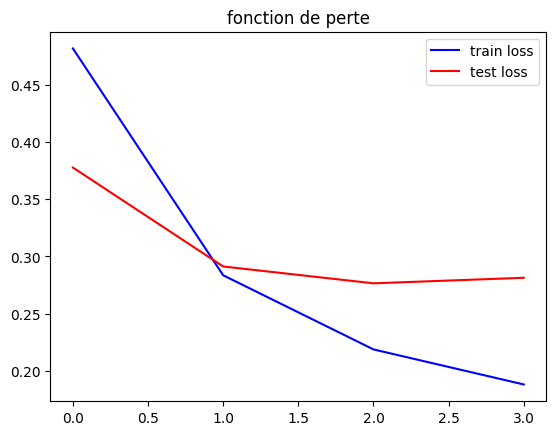

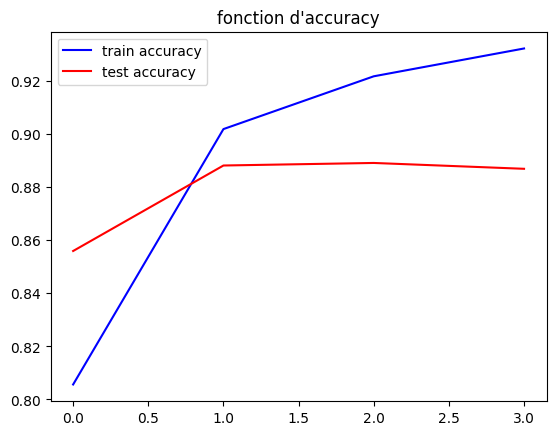

In [24]:
trainloss = history.history ["loss"]
testloss = history.history ["val_loss"]
trainaccuracy = history.history["accuracy"]
testaccuracy = history.history ["val_accuracy"]


plot (range (4), trainloss, 'b', label = "train loss")
plot (range (4), testloss, 'r', label = "test loss")
title ("fonction de perte")
legend ()
show ()

plot (range (4), trainaccuracy, 'b', label = "train accuracy")
plot (range (4), testaccuracy, 'r', label = "test accuracy")
title ("fonction d'accuracy")
legend ()
show ()

## 6. Validation des performances

In [25]:
loss, accuracy = model.evaluate (xtest, ytest, verbose = 1)
print (" ")
print (f"Le modèle a une précision de {accuracy*100} pourcent")

782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step - accuracy: 0.8859 - loss: 0.2821
 
Le modèle a une précision de 88.68799805641174 pourcent
